# Exercise 2 : Processing node

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 
import math
from IPython.display import Image, display

In [2]:
class AgentState(TypedDict):
    name: str 
    values: List[int]
    operation: str
    result: str 

In [3]:
def Processor(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    if    state["operation"] == "+":
          state["result"] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    elif  state["operation"] == "*":
          state["result"] = f"Hi {state['name']}, your answer is: {math.prod(state['values'])}"
    else:
          state["result"] = "Invalid!"

    return state

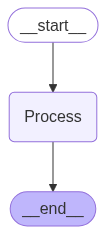

In [4]:
graph = StateGraph(AgentState)
graph.add_node("Process", Processor)
graph.set_entry_point("Process") 
graph.set_finish_point("Process") 
app = graph.compile() 
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
answers = app.invoke({"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "*"})
print(answers["result"])

Hi Jack Sparrow, your answer is: 24
